In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tf1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_val, Y_val) = tf.keras.datasets.mnist.load_data()
print("Shape of feature matrix:", X_train.shape)
print("Shape of target matrix:", Y_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
Shape of feature matrix: (60000, 28, 28)
Shape of target matrix: (60000,)


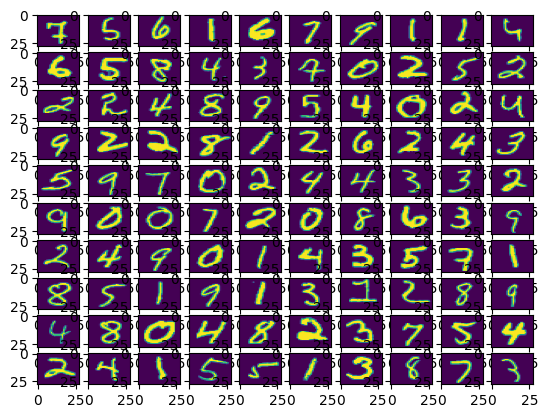

In [3]:
# visualize data by plotting images
fig, ax = plt.subplots(10, 10)
for i in range(10):
	for j in range(10):
		k = np.random.randint(0,X_train.shape[0])
		ax[i][j].imshow(X_train[k].reshape(28, 28), aspect='auto')
plt.show()


In [4]:
num_features = 784
num_labels = 10
learning_rate = 0.05
batch_size = 128
num_steps = 5001

# input data
train_dataset = X_train.reshape(-1, 784)
train_labels = pd.get_dummies(Y_train).values
valid_dataset = X_val.reshape(-1, 784)
valid_labels = pd.get_dummies(Y_val).values


In [6]:
# initialize a tensorflow graph
graph = tf.Graph()

with graph.as_default():
	# Inputs
	tf_train_dataset = tf1.placeholder(tf.float32,
									shape=(batch_size, num_features))
	tf_train_labels = tf1.placeholder(tf.float32,
									shape=(batch_size, num_labels))
	tf_valid_dataset = tf.constant(valid_dataset)

	# Variables.
	weights = tf.Variable(
		tf.random.truncated_normal([num_features, num_labels]))
	biases = tf.Variable(tf.zeros([num_labels]))

	# Training computation.
	logits = tf.matmul(tf_train_dataset, weights) + biases
	loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
		labels=tf_train_labels, logits=logits))

	# Optimizer.
	optimizer = tf1.train.GradientDescentOptimizer(
		learning_rate).minimize(loss)

	# Predictions for the training, validation, and test data.
	train_prediction = tf.nn.softmax(logits)
	tf_valid_dataset = tf.cast(tf_valid_dataset, tf.float32)
	valid_prediction = tf.nn.softmax(
		tf.matmul(tf_valid_dataset, weights) + biases)


In [7]:
# utility function to calculate accuracy
def accuracy(predictions, labels):
	correctly_predicted = np.sum( np.argmax(predictions, 1) == np.argmax(labels, 1))
	acc = (100.0 * correctly_predicted) / predictions.shape[0]
	return acc


In [8]:
with tf1.Session(graph=graph) as session:
	# initialize weights and biases
	tf1.global_variables_initializer().run()
	print("Initialized")

	for step in range(num_steps):
		# pick a randomized offset
		offset = np.random.randint(0, train_labels.shape[0] - batch_size - 1)

		# Generate a minibatch.
		batch_data = train_dataset[offset:(offset + batch_size), :]
		batch_labels = train_labels[offset:(offset + batch_size), :]

		# Prepare the feed dict
		feed_dict = {tf_train_dataset: batch_data,
					tf_train_labels: batch_labels}

		# run one step of computation
		_, l, predictions = session.run([optimizer, loss, train_prediction],
										feed_dict=feed_dict)

		if (step % 500 == 0):
			print("Minibatch loss at step {0}: {1}".format(step, l))
			print("Minibatch accuracy: {:.1f}%".format(
				accuracy(predictions, batch_labels)))
			print("Validation accuracy: {:.1f}%".format(
				accuracy(valid_prediction.eval(), valid_labels)))


Initialized
Minibatch loss at step 0: 4185.86328125
Minibatch accuracy: 8.6%
Validation accuracy: 30.8%
Minibatch loss at step 500: 349.0372314453125
Minibatch accuracy: 88.3%
Validation accuracy: 89.0%
Minibatch loss at step 1000: 1443.69873046875
Minibatch accuracy: 83.6%
Validation accuracy: 89.0%
Minibatch loss at step 1500: 149.69580078125
Minibatch accuracy: 95.3%
Validation accuracy: 90.4%
Minibatch loss at step 2000: 300.93597412109375
Minibatch accuracy: 89.8%
Validation accuracy: 91.0%
Minibatch loss at step 2500: 1218.258544921875
Minibatch accuracy: 79.7%
Validation accuracy: 86.3%
Minibatch loss at step 3000: 1038.2054443359375
Minibatch accuracy: 82.8%
Validation accuracy: 85.7%
Minibatch loss at step 3500: 593.8976440429688
Minibatch accuracy: 88.3%
Validation accuracy: 89.0%
Minibatch loss at step 4000: 415.2081298828125
Minibatch accuracy: 89.1%
Validation accuracy: 86.2%
Minibatch loss at step 4500: 449.54541015625
Minibatch accuracy: 91.4%
Validation accuracy: 89.7%
